# O período de um oscilador não harmônico

* PET - Física UFRN
* Petiano: Moisés da Rocha Alves
* Data: 16 de Fevereiro de 2021

O objetivo deste `Notebook` é descrever o período de um oscilador não harmônico utilizando recursos computacionais.

Este `Notebook` ficará separado em duas seções principais. A primeira seção introduzirá o conceito de um oscilador não harmônico e forma de calcularmos seu período, enquanto na segunda seção será mostrado um exemplo de oscilador não harmônico.

A inspiração para a criação deste `Notebook` veio de um problema tratado na referência [[1]]().

### Importando as bibliotecas necessárias

Neste `Notebook`, utilizaremos as bibliotecas `matplotlib`, `scipy` e `numpy`.

In [1]:
import matplotlib.pyplot as plt
import scipy.integrate as sp
import numpy as np

## 1.1 O que é um oscilador não harmônico?

Nas oscilações harmônicas, tínhamos que a força restauradora era proporcional em magnitude (e oposta em direção) ao deslocamento de $x$ em relação a sua posição natural $x_0$. A equação diferencial resultante desta afirmação nos dirá que $x$ oscilará de forma senoidal ao longo do tempo e com um período inerente ao sistema. Isso significa, também, que $x$ poderá oscilar com qualquer amplitude, mas o período sempre será o mesmo.

As oscilações não harmônicas, entretanto, tem como característica fundamental a não lineariedade da força restauradora em relação ao deslocamento de $x$. Como resultado dessa não lineariedade, a frequência deste sistema pode mudar dependendo do deslocamento neste sistema. Desta forma, o período de um oscilador não harmônico pode vir a depender da amplitude do movimento.

Fato é que o comportamento deste tipo de oscilação não pode, geralmente, ser descrito de forma analítica (eis a razão deste Notebook ter sido produzido). Para resolvermos isso, construíremos uma abordagem computacional de resolver o problema.

## 1.2 Encontrando uma expressão para o período

Um oscilador genérico clássico pode ser descrito como uma partícula presa em um poço de potencial côncavo. Quando este sistema é perturbado, a partícula irá oscilar de um lado a outro neste poço.

<img src="../Imagens/potentialwell.png" style="margin:auto"/>

Note que um oscilador harmônico terá um potencial correspondente proporcional ao quadrado de $x$. Isto é, $V(x) \propto x^2$ (por exemplo, para um MHS no caso de uma mola sujeita a uma força restauradora $F=-kx$, teremos um potencial $V(x)$ associado que vale $V(x) = \frac{1}{2}kx^2$). Desta forma, qualquer outra forma de potencial nos dará um oscilador não harmônico.

Podemos calcular o movimento de um oscilador através da conservação da energia do sistema. Isto é, se a partícula tem massa $m$ e posição $x$, teremos uma energia total igual a soma das energias cinética e potencial. Assim:

$$
E = \frac{1}{2} m \bigg(\frac{dx}{dt}\bigg)^2 + V(x).
$$

Como a energia deve ser constante no tempo, temos então uma equação diferencial de $x$ e $t$.

Devemos, agora, assumir que o potencial $V(x)$ é simétrico em relação a $x=0$ e que o oscilador não harmônico terá uma amplitude $a$. Iremos assumir, também, que em um tempo $t = 0$ soltaremos o oscilador de sua posição de repouso em $x = a$. Desta forma, em $t = 0$, teremos que $\frac{dx}{dt} = 0$ e, portanto, a energia total para este tempo será dada por $E = V(a)$.

Assim, ficaremos com a seguinte equação (lembre-se que $E$ é constante no tempo):

$$
V(a) = \frac{1}{2} m \bigg(\frac{dx}{dt}\bigg)^2 + V(x).
$$

Se rearranjarmos a expressão, ficaremos com:

$$
\frac{dx}{dt} = \sqrt{\frac{2}{m}} \sqrt{V(a) - V(x)}.
$$

Onde, rearrajando novamente, e escrevendo em termos dos diferenciais:

$$
\sqrt{\frac{m}{2}} \frac{1}{\sqrt{V(a) - V(x)}} dx = dt.
$$

Aqui, lembremos que quando a partícula chega a origem pela primeira vez, ela terá percorrido cerca de $1/4$ do período $T$ do oscilador. Portanto, devemos integrar a equação para $t$ de $0$ até $\frac{1}{4}T$, e para $x$ de $0$ até $a$. Assim:

$$
\int_{0}^{a} \sqrt{\frac{m}{2}} \frac{1}{\sqrt{V(a) - V(x)}} dx = \int_{0}^{\frac{1}{4}T} dt.
$$

E, portanto, resolvendo a integral para $t$ e escrevendo a equação em termos do período, teremos:

$$
T = \sqrt{8m} \int_{0}^{a} \frac{1}{\sqrt{V(a) - V(x)}} dx,
$$

que corresponde a nossa expressão desejada para o período de um oscilador.

Agora, queremos ver como o período de um oscilador não harmônico se comporta em função de um certo conjunto de valores de $a$, dado um valor para o potencial $V(x)$.

## 2.1 Computando o período de um oscilador harmônico

Primeiramente, antes de tratarmos um oscilador não harmônico, computemos o caso simples. Isto é, calcularemos o período de um oscilador harmônico utilizando o método proposto. 

Definiremos, assim, o potencial $V(x)$ como sendo $V(x) = x^2$, que corresponde ao potencial de um oscilador harmônico (isto é, $V(x) \propto x^2$). Definiremos a função V(x) que representará o potencial e a função f(x) a ser integrada. Consideraremos, também, para fins práticos, que $m=1$ (as unidades serão omitidas a partir daqui, mas apenas considere que todos os valores estão em unidades do SI, se necessário).

In [2]:
def V(x):
    return x**2

def f(x,a):
    return 1/np.sqrt(V(a) - V(x))

m = 1

Agora, definiremos os valores de $a$ variando de $a = 0.1$ até $a = 2.0$ com $100$ pontos utilizando a função `linspace` do `numpy`. Definiremos, também, uma lista vazia que conterá os valores dos períodos.

In [3]:
a_list = np.linspace(0.1, 2.0, 100)
T_list = []

E, então, utilizando a função `quad` do `scipy.integrate` para resolvermos a integral dada, calcularemos o resultado do período para cada valor de $a$.

In [4]:
for a in a_list:
    val_int, error = sp.quad(f, 0, a, args=(a,))
    T = np.sqrt(8*m)*val_int
    T_list.append(T)

Por fim, faremos o plot do gráfico.

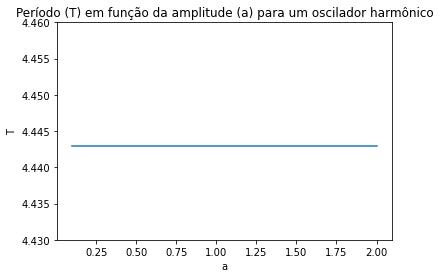

In [5]:
plt.plot(a_list, T_list)
plt.title("Período (T) em função da amplitude (a) para um oscilador harmônico")
plt.xlabel("a")
plt.ylabel("T")
plt.ylim(4.43,4.46)
plt.show()

Podemos ver, então, que o período permanece constante mesmo que a amplitude seja alterada, conforme o esperado para um oscilador harmônico.

O período vale exatamente o valor teórico previsto para um MHS: $T = 2\pi \sqrt{\frac{m}{k}}$, com $k = 2$ para este caso ($T \approx 4.44288$).

## 2.2 Computando o período de um oscilador não harmônico

Faremos um procedimento análogo a situação anterior, entretanto consideraremos agora que $V(x) = x^4$, o que fará com que o nosso oscilador seja agora não harmônico.

In [6]:
def V(x):
    return x**4

Definiremos novamente a lista vazia que conterá os valores dos períodos e calcularemos novamente o valor para os períodos em função dos valores de $a$.

In [7]:
T_list = []

for a in a_list:
    val_int, error = sp.quad(f, 0, a, args=(a,))
    T = np.sqrt(8*m)*val_int
    T_list.append(T)

Por fim, faremos novamente o plot.

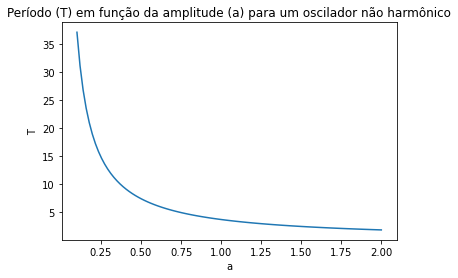

In [8]:
plt.plot(a_list, T_list)
plt.title("Período (T) em função da amplitude (a) para um oscilador não harmônico")
plt.xlabel("a")
plt.ylabel("T")
plt.show()

Note que o oscilador se torna cada vez mais rápido a medida que aumentamos a amplitude. Também, quando a amplitude tende a $0$, o período diverge. 

Como a amplitude de oscilação efetivamente altera o período do oscilador, concluímos que definitivamente este é um oscilador não harmônico.

## Referências

<a id="ref1"></a>
[[1]]() Mark Newman - Computational Physics (2013, University of Michigan).